In [1]:
!pip install -q python-docx spacy textblob matplotlib wordcloud python-docx nltk
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Named Entity Recognition Results:
--------------------------------------------------


,Entity,Category
0,AI,ORG
1,Google,ORG
2,Microsoft,ORG
3,OpenAI,GPE
4,AI,ORG
5,AI,ORG
6,AI,ORG
7,AI,ORG
8,the coming years,DATE



Sentiment Analysis Results:
--------------------------------------------------
Polarity: 0.13 (-1 negative to 1 positive)
Subjectivity: 0.78 (0 objective to 1 subjective)
Sentiment Category: POSITIVE

Most Frequent Words Word Cloud:


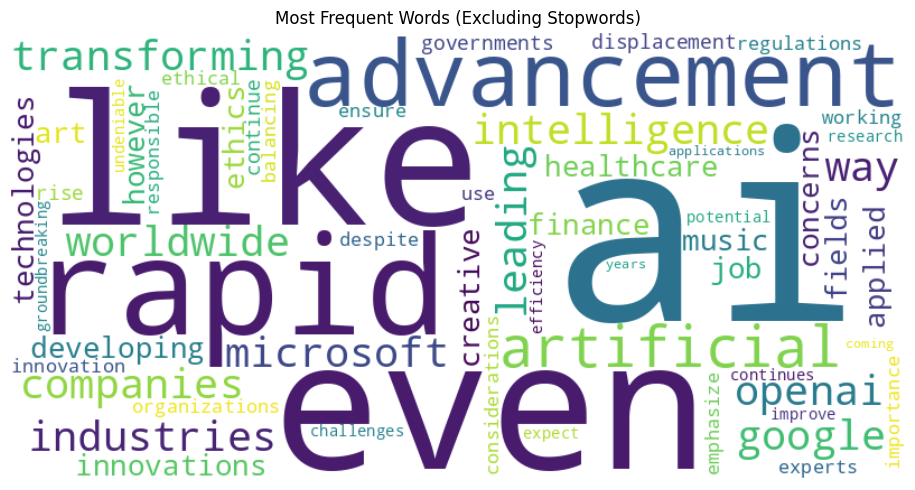


Top 20 Most Frequent Words:
--------------------------------------------------


,Word,Frequency
0,ai,5
1,like,2
2,even,2
3,rapid,1
4,advancement,1
5,artificial,1
6,intelligence,1
7,transforming,1
8,industries,1
9,worldwide,1


In [1]:
import spacy
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import en_core_web_sm
import pandas as pd
from IPython.display import display
from docx import Document
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


class TextAnalyzer:
    """A class to perform text analysis on document files."""

    def __init__(self):
        """Initialize the TextAnalyzer with necessary resources."""
        # Download required NLTK resources
        nltk.download('stopwords', quiet=True)
        nltk.download('punkt_tab', quiet=True)


        self.nlp = en_core_web_sm.load()


        self.stop_words = set(stopwords.words('english'))

    def load_text(self, file_path):
        """Load text from docx file."""
        try:
            doc = Document(file_path)
            # Extract text from all paragraphs
            full_text = []
            for para in doc.paragraphs:
                full_text.append(para.text)
            return ' '.join(full_text)
        except Exception as e:
            print(f"Error reading file: {e}")
            return None

    def perform_ner(self, text):
        """Perform Named Entity Recognition using spaCy."""
        # Reuse the pre-loaded NLP model
        doc = self.nlp(text)

        # Extract entities and their labels
        entities = [(ent.text, ent.label_) for ent in doc.ents]

        # Create DataFrame for better display
        df = pd.DataFrame(entities, columns=['Entity', 'Category'])
        return df, Counter(df['Category'])

    def analyze_sentiment(self, text):
        """Analyze sentiment using TextBlob."""
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity

        # Categorize sentiment
        if polarity > 0.1:
            category = "positive"
        elif polarity < -0.1:
            category = "negative"
        else:
            category = "neutral"

        return {
            'polarity': polarity,
            'subjectivity': subjectivity,
            'category': category
        }

    def create_wordcloud(self, text):
        """Create a word cloud of most frequent words, excluding stopwords."""
        # Tokenize text
        tokens = word_tokenize(text.lower())

        # Remove stopwords and non-alphabetic tokens - use instance variable
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in self.stop_words]

        # Count word frequencies
        word_freq = Counter(filtered_tokens)

        # Create word cloud if we have words
        if not word_freq:
            print("No significant words found to create word cloud.")
            return None

        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             max_words=100).generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most Frequent Words (Excluding Stopwords)')
        plt.tight_layout()
        plt.show()

        # Return the top 20 most common words for reference
        return word_freq.most_common(20)

    def analyze_document(self, file_path):
        """Main method to analyze a document file."""

        text = self.load_text(file_path)
        if text is None or not text.strip():
            print("No text content found in the document.")
            return


        results = {}


        print("Named Entity Recognition Results:")
        print("-" * 50)
        entities_df, entity_counts = self.perform_ner(text)
        results['entities'] = entities_df
        results['entity_counts'] = entity_counts

        if entities_df.empty:
            print("No named entities found in the text.")
        else:
            display(entities_df)


        sentiment = self.analyze_sentiment(text)
        results['sentiment'] = sentiment
        print("\nSentiment Analysis Results:")
        print("-" * 50)
        print(f"Polarity: {sentiment['polarity']:.2f} (-1 negative to 1 positive)")
        print(f"Subjectivity: {sentiment['subjectivity']:.2f} (0 objective to 1 subjective)")
        print(f"Sentiment Category: {sentiment['category'].upper()}")

        # Create word cloud of most frequent words
        print("\nMost Frequent Words Word Cloud:")
        top_words = self.create_wordcloud(text)
        results['top_words'] = top_words


        if top_words:
            print("\nTop 20 Most Frequent Words:")
            print("-" * 50)
            top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
            display(top_words_df)
            results['top_words_df'] = top_words_df

        return results



if __name__ == "__main__":
    analyzer = TextAnalyzer()
    file_path = "/content/[HIRING]_ NLP Task.docx"
    results = analyzer.analyze_document(file_path)

# **TF-IDF scoring**

Loaded 3 paragraphs from document.

Top 10 words by TF-IDF score:
----------------------------------------


,word,tfidf
0,ai,0.206794
1,like,0.120922
2,years,0.085083
3,potential,0.085083
4,groundbreaking,0.085083
5,improve,0.085083
6,efficiency,0.085083
7,despite,0.085083
8,decision,0.085083
9,making,0.085083


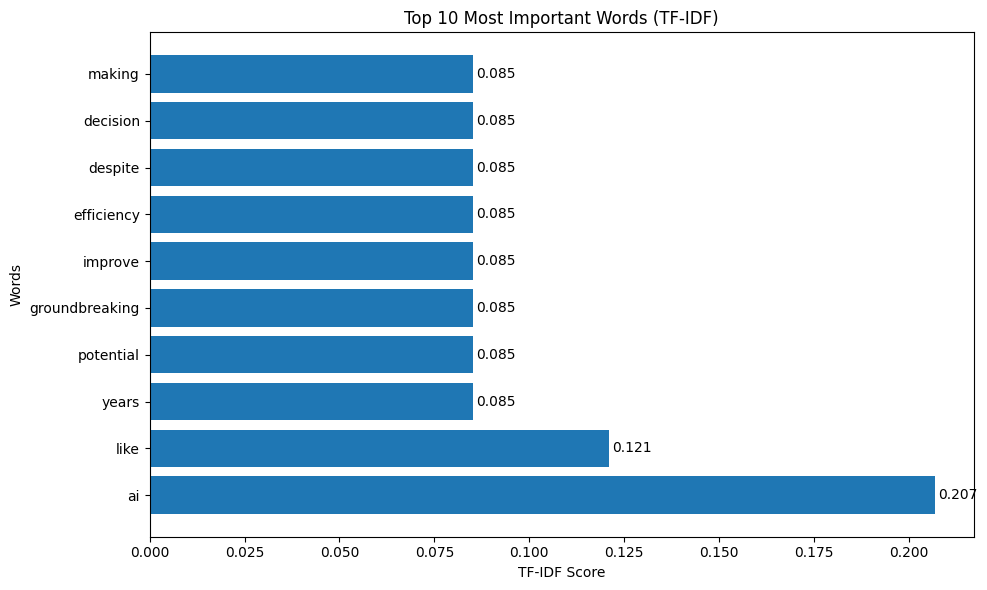

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from docx import Document
import numpy as np

def load_text_from_docx(file_path):
    """Load text from a docx file."""
    try:
        doc = Document(file_path)
        full_text = []
        for para in doc.paragraphs:
            if para.text.strip():
                full_text.append(para.text)
        return full_text
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

def get_top_tfidf_words(documents, n=10):
    """
    Extract the top n words with highest TF-IDF scores from documents.
    """

    tfidf_vectorizer = TfidfVectorizer(
        max_features=1000,
        stop_words='english',
        min_df=1,
        max_df=1.0,
        ngram_range=(1, 1)
    )


    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_means = np.mean(tfidf_matrix.toarray(), axis=0)
    tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf': tfidf_means})
    top_words = tfidf_df.sort_values(by='tfidf', ascending=False).head(n)

    return top_words

def visualize_top_words(top_words_df):
    """Create a horizontal bar chart of top words by TF-IDF score."""
    plt.figure(figsize=(10, 6))


    plt.barh(top_words_df['word'], top_words_df['tfidf'])


    plt.xlabel('TF-IDF Score')
    plt.ylabel('Words')
    plt.title('Top 10 Most Important Words (TF-IDF)')


    for i, v in enumerate(top_words_df['tfidf']):
        plt.text(v + 0.001, i, f"{v:.3f}", va='center')

    plt.tight_layout()
    plt.show()

def analyze_document_tfidf(file_path, n=10):
    """Analyze document and extract top n words by TF-IDF score."""
    # Load paragraphs from the document
    paragraphs = load_text_from_docx(file_path)

    if not paragraphs:
        print("No content could be loaded from the document.")
        return

    print(f"Loaded {len(paragraphs)} paragraphs from document.")

    # Get top TF-IDF words
    top_words = get_top_tfidf_words(paragraphs, n)


    print(f"\nTop {n} words by TF-IDF score:")
    print("-" * 40)

    # Format the DataFrame for display
    display(top_words.reset_index(drop=True))


    visualize_top_words(top_words)

    return top_words

file_path = "/content/[HIRING]_ NLP Task.docx"
top_words = analyze_document_tfidf(file_path, n=10)